# 베이즈 추정법

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
import seaborn as sns
import sklearn

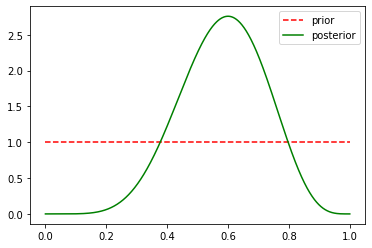

In [2]:
xx = np.linspace(0, 1, 1000)
a0, b0 = 1, 1
plt.plot(xx, sp.stats.beta(a0, b0).pdf(xx), c="r", ls="--", label="prior")
a1, b1 = 6 + 1, 4 + 1
plt.plot(xx, sp.stats.beta(a1, b1).pdf(xx), c="g", ls="-", label="posterior")
plt.legend()
#plt.title("베이즈 추정법으로 계산한 베르누이분포 모수의 분포")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


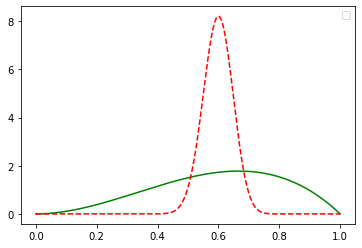

In [4]:
aA, bA = 3, 2
aB, bB = 61, 41
xx = np.linspace(0, 1, 1000)
plt.plot(xx, sp.stats.beta(aA, bA).pdf(xx), c = 'g', ls = '-')
plt.plot(xx, sp.stats.beta(aB, bB).pdf(xx), c = 'r', ls = '--')
plt.legend()
plt.show()

초기 추정: 모드 = 모름
0차 추정: 모드 = 0.64
1차 추정: 모드 = 0.69
2차 추정: 모드 = 0.65


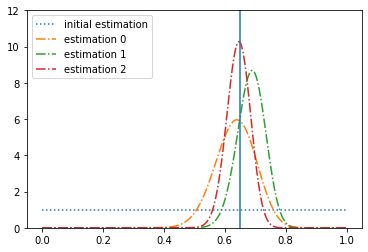

In [6]:
mu0 = 0.65
a, b = 1, 1
print("초기 추정: 모드 = 모름")

xx = np.linspace(0, 1, 1000)
plt.plot(xx, sp.stats.beta(a, b).pdf(xx), ls=":", label="initial estimation")

np.random.seed(0)

for i in range(3):
    x = sp.stats.bernoulli(mu0).rvs(50)
    N0, N1 = np.bincount(x, minlength=2)
    a, b = a + N1, b + N0
    plt.plot(xx, sp.stats.beta(a, b).pdf(xx), ls="-.", label="estimation {}".format(i))
    print("{}차 추정: 모드 = {:4.2f}".format(i, (a - 1)/(a + b - 2)))


plt.vlines(x=0.65, ymin=0, ymax=12)
plt.ylim(0, 12)
plt.legend()
#plt.title("베르누이분포의 모수를 베이즈 추정법으로 추정한 결과")
plt.show()

In [7]:
def plot_dirichlet(alpha, n):

    def project(x):
        n1 = np.array([1, 0, 0])
        n2 = np.array([0, 1, 0])
        n3 = np.array([0, 0, 1])
        n12 = (n1 + n2)/2
        m1 = np.array([1, -1, 0])
        m2 = n3 - n12
        m1 = m1/np.linalg.norm(m1)
        m2 = m2/np.linalg.norm(m2)
        return np.dstack([(x-n12).dot(m1), (x-n12).dot(m2)])[0]

    def project_reverse(x):
        n1 = np.array([1, 0, 0])
        n2 = np.array([0, 1, 0])
        n3 = np.array([0, 0, 1])
        n12 = (n1 + n2)/2
        m1 = np.array([1, -1, 0])
        m2 = n3 - n12
        m1 = m1/np.linalg.norm(m1)
        m2 = m2/np.linalg.norm(m2)
        return x[:, 0][:, np.newaxis] * m1 + x[:, 1][:, np.newaxis] * m2 + n12

    eps = np.finfo(float).eps * 10
    X = project([[1-eps, 0, 0], [0, 1-eps, 0], [0, 0, 1-eps]])

    import matplotlib.tri as mtri

    triang = mtri.Triangulation(X[:, 0], X[:, 1], [[0, 1, 2]])
    refiner = mtri.UniformTriRefiner(triang)
    triang2 = refiner.refine_triangulation(subdiv=6)
    XYZ = project_reverse(
        np.dstack([triang2.x, triang2.y, 1-triang2.x-triang2.y])[0])

    pdf = sp.stats.dirichlet(alpha).pdf(XYZ.T)
    plt.tricontourf(triang2, pdf, cmap=plt.cm.bone_r)
    plt.axis("equal")
    #plt.title("정규분포 확률변수의 모수를 베이즈 추정법으로 추정한 결과: {} 추정".format(n))
    plt.show()

mu0 = np.array([0.3, 0.5, 0.2])

np.random.seed(0)

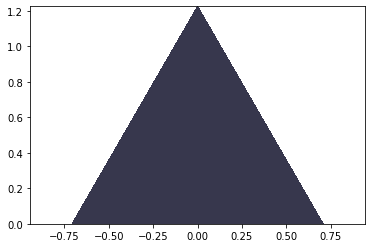

In [8]:
a0 = np.ones(3)
plot_dirichlet(a0, "초기")

종류별 붓꽃의 수 =[10 32  8]
1차 추정 하이퍼모수: [0.2  0.64 0.16]


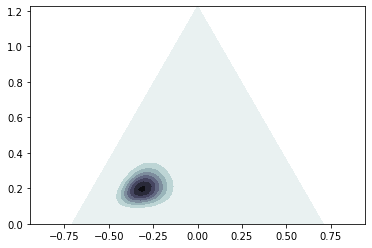

In [9]:
x1 = np.random.choice(3, 50, p=mu0)
N1 = np.bincount(x1, minlength=3)
a1 = a0 + N1

print("종류별 붓꽃의 수 ={}".format(N1))
print("1차 추정 하이퍼모수:", (a1 - 1)/(a1.sum() - 3))

plot_dirichlet(a1, "1차")

종류별 붓꽃의 수 =[24 19  7]
2차 추정 하이퍼모수: [0.34 0.51 0.15]


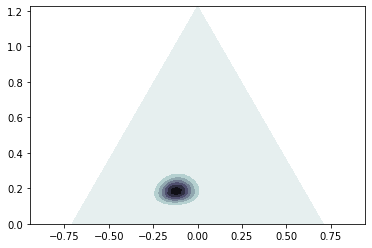

In [10]:
x2 = np.random.choice(3, 50, p=mu0)
N2 = np.bincount(x2, minlength=3)
a2 = a1 + N2

print("종류별 붓꽃의 수 ={}".format(N2))
print("2차 추정 하이퍼모수:", (a2 - 1)/(a2.sum() - 3))

plot_dirichlet(a2, "2차")

0차 추정: 1.98
1차 추정: 2.07
2차 추정: 2.05
3차 추정: 2.03


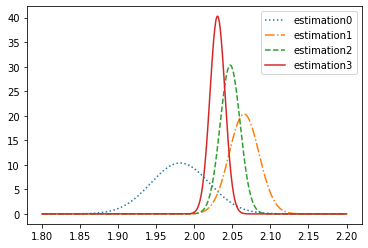

In [12]:
mu, sigma2 = 2, 4
mu0, sigma20 = 0, 1
xx = np.linspace(1.8, 2.2, 1000)
np.random.seed(1)
N = 100
ls = [":", "-.", "--", "-"]
for i in range(4):
    x = sp.stats.norm(mu).rvs(N)
    mu0 = sigma2/(N*sigma20 + sigma2) * mu0 + \
        (N*sigma20)/(N*sigma20 + sigma2)*x.mean()
    sigma20 = 1/(1/sigma20 + N/sigma2)
    plt.plot(xx, sp.stats.norm(mu0, sigma20).pdf(xx), ls=ls[i], label="estimation{}".format(i))
    print("{}차 추정: {:4.2f}".format(i, mu0))
plt.legend()
#plt.title("정규분포의 기댓값을 베이즈 추정법으로 추정한 결과")
plt.show()